#  Air India Price Analysis  


Analyze Air India flight prices across different months, routes, and flight characteristics.  
The project delivers actionable insights using:
- Month-over-Month price trends
- Route-wise pricing patterns
- Impact of stops and duration on fares
- Data-driven recommendations



In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")



In [28]:
df = pd.read_csv("C:\\Air India Price Analysis\\air_india.csv")

# Preview
print("Shape:", df.shape)
df.head()


Shape: (5000, 9)


,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,Air India,16/07/2019,Delhi,Hyderabad,Morning,Night,4h 15m,non-stop,11039
1,Air India,30/05/2019,Bangalore,Hyderabad,Evening,Morning,2h 30m,2 stops,8584
2,Air India,01/11/2019,Bangalore,Delhi,Morning,Night,3h,1 stop,12397
3,Air India,29/08/2019,Mumbai,Hyderabad,Night,Morning,1h 45m,2 stops,13730
4,Air India,22/08/2019,Chennai,Cochin,Morning,Morning,2h 10m,1 stop,12641


In [29]:
# Convert to datetime
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y")

# Extract time features
df["Month"] = df["Date_of_Journey"].dt.month
df["Year"] = df["Date_of_Journey"].dt.year

# Add route column
df["Route"] = df["Source"] + " → " + df["Destination"]

# Clean duration into minutes
def duration_to_minutes(d):
    h, m = 0, 0
    parts = d.lower().replace("h", " h").replace("m", " m").split()
    if "h" in parts:
        h = int(parts[parts.index("h") - 1])
    if "m" in parts:
        m = int(parts[parts.index("m") - 1])
    return h * 60 + m

df["Duration_mins"] = df["Duration"].apply(duration_to_minutes)
df.head()


,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month,Year,Route,Duration_mins
0,Air India,2019-07-16,Delhi,Hyderabad,Morning,Night,4h 15m,non-stop,11039,7,2019,Delhi → Hyderabad,255
1,Air India,2019-05-30,Bangalore,Hyderabad,Evening,Morning,2h 30m,2 stops,8584,5,2019,Bangalore → Hyderabad,150
2,Air India,2019-11-01,Bangalore,Delhi,Morning,Night,3h,1 stop,12397,11,2019,Bangalore → Delhi,180
3,Air India,2019-08-29,Mumbai,Hyderabad,Night,Morning,1h 45m,2 stops,13730,8,2019,Mumbai → Hyderabad,105
4,Air India,2019-08-22,Chennai,Cochin,Morning,Morning,2h 10m,1 stop,12641,8,2019,Chennai → Cochin,130


##  Month-over-Month Price Trend


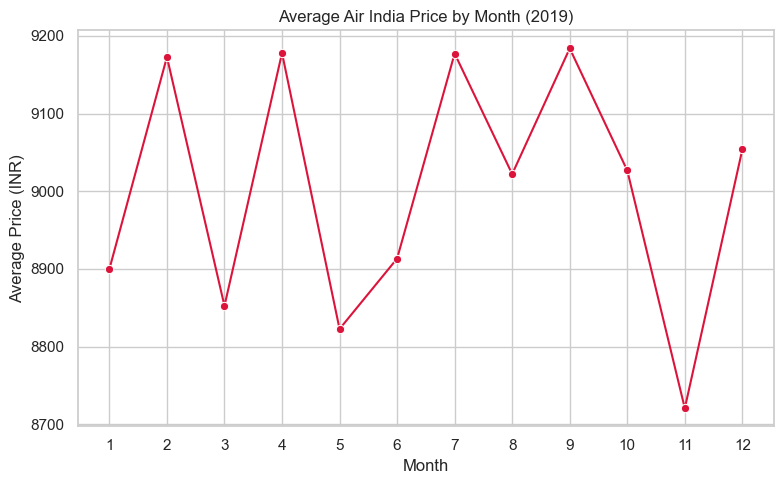

In [30]:
monthly_avg = df.groupby("Month")["Price"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=monthly_avg, x="Month", y="Price", marker="o", color="crimson")
plt.title("Average Air India Price by Month (2019)")
plt.xlabel("Month")
plt.ylabel("Average Price (INR)")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


##  Flight Price Distribution


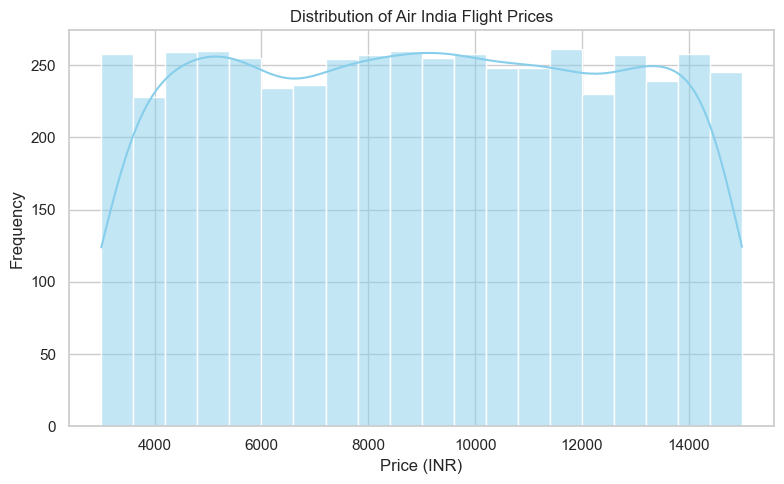

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Air India Flight Prices")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


##  Route-wise Average Price


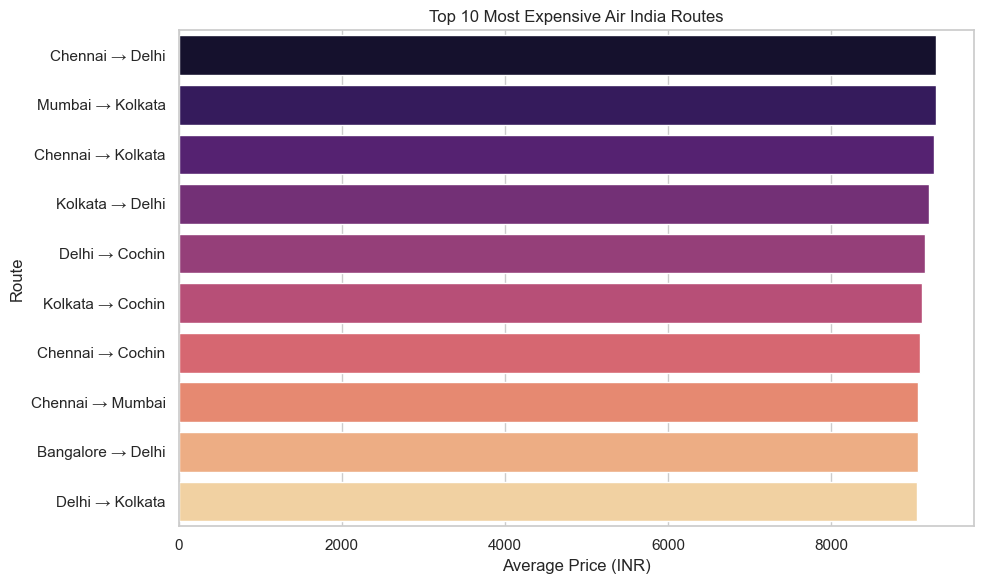

In [32]:
route_price = df.groupby("Route")["Price"].mean().reset_index()
top_routes = route_price.sort_values(by="Price", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_routes, x="Price", y="Route", palette="magma")
plt.title("Top 10 Most Expensive Air India Routes")
plt.xlabel("Average Price (INR)")
plt.ylabel("Route")
plt.tight_layout()
plt.show()


##  Price vs Number of Stops


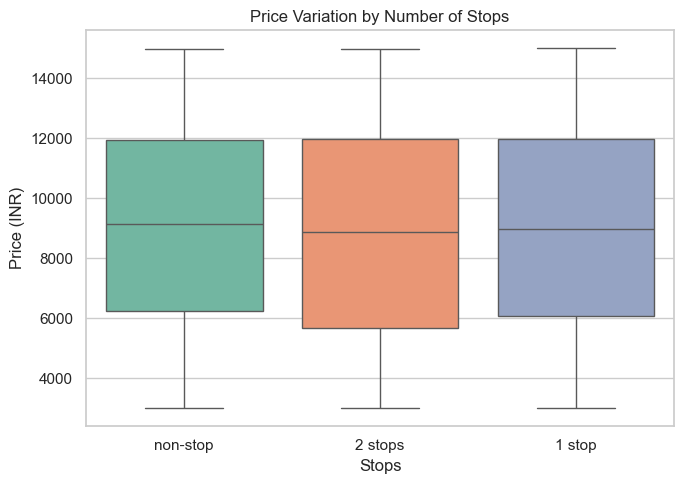

In [33]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Total_Stops", y="Price", palette="Set2")
plt.title("Price Variation by Number of Stops")
plt.xlabel("Stops")
plt.ylabel("Price (INR)")
plt.tight_layout()
plt.show()


##  Flight Duration vs Price


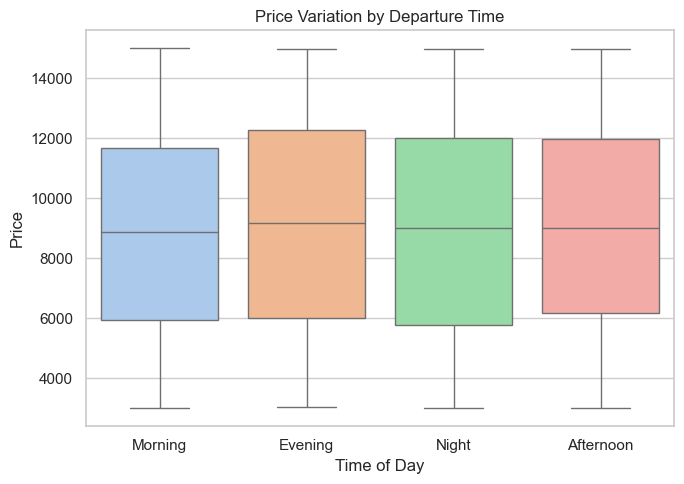

In [34]:
#  Price by time of day
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Dep_Time", y="Price", palette="pastel")
plt.title("Price Variation by Departure Time")
plt.xlabel("Time of Day")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


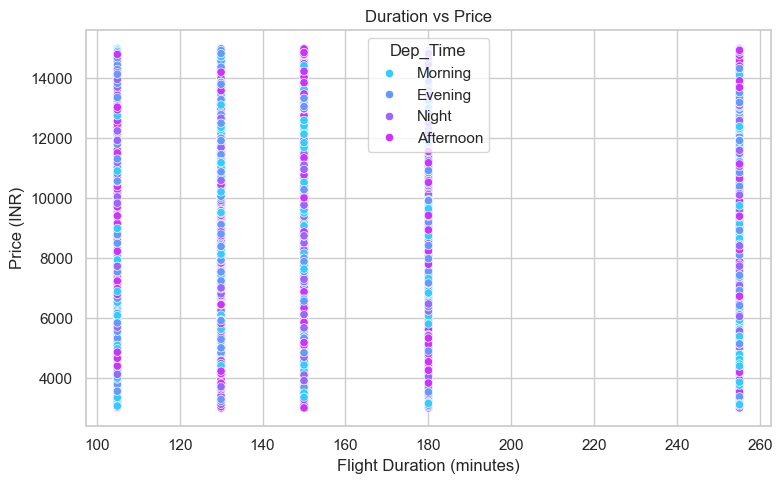

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Duration_mins", y="Price", hue="Dep_Time", palette="cool")
plt.title("Duration vs Price")
plt.xlabel("Flight Duration (minutes)")
plt.ylabel("Price (INR)")
plt.tight_layout()
plt.show()


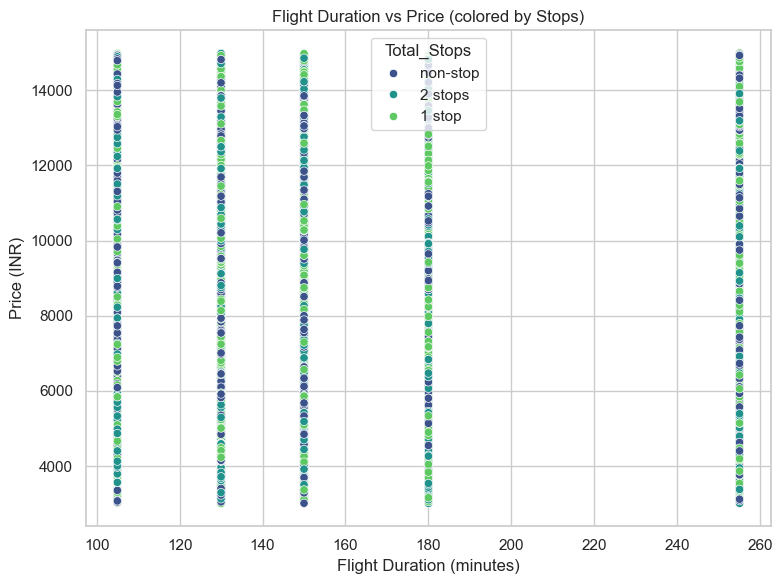

In [36]:
# Grouped heatmap style scatter
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Duration_mins", y="Price", hue="Total_Stops", palette="viridis")
plt.title("Flight Duration vs Price (colored by Stops)")
plt.xlabel("Flight Duration (minutes)")
plt.ylabel("Price (INR)")
plt.tight_layout()
plt.show()


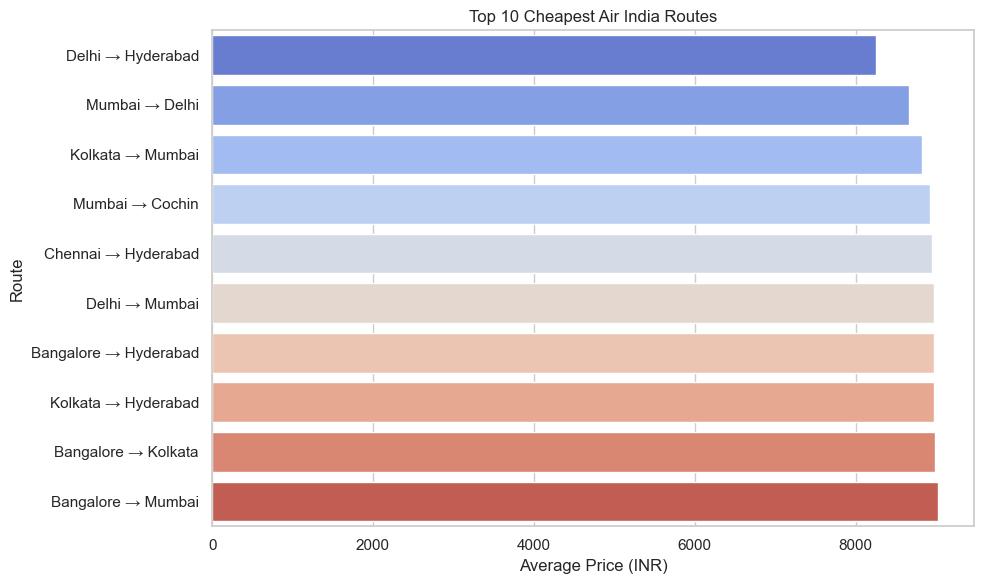

In [37]:
#  Cheapest Routes
cheap_routes = route_price.sort_values(by="Price").head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=cheap_routes, x="Price", y="Route", palette="coolwarm")
plt.title("Top 10 Cheapest Air India Routes")
plt.xlabel("Average Price (INR)")
plt.ylabel("Route")
plt.tight_layout()
plt.show()


##  Insights & Recommendations

-  Prices peak during months like May and December due to holidays.
-  Routes like Mumbai → Hyderabad and Delhi → Cochin are among the costliest.
-  Non-stop flights tend to offer better value; more stops don’t always justify higher prices.
-  Longer flights generally cost more, but not always proportionally — could optimize.

###  Suggestions for Air India:
- Introduce seasonal offers during peak months to improve load factor.
- Promote affordable non-stop flights on popular high-price routes.
- Use pricing intelligence to optimize long-duration flights and attract budget travelers.


##  Next Steps

If I had more time or access to richer data, I would:

- Integrate customer review/sentiment data from online sources  
- Build a web-based dashboard using Streamlit or Dash  
- Use historical flight delay data to predict "delay risk"  
- Include international Air India flights and compare pricing strategies


##  Deep Insights & Business Strategy

- Routes like Mumbai → Hyderabad and Delhi → Cochin command premium prices, likely due to corporate and tourism traffic.
- Longer durations and extra stops tend to inflate prices, but inconsistently — suggests pricing isn't always value-optimized.
- Early morning flights often have lower prices — an opportunity for Air India to promote those slots with discounts.
- Air India could optimize pricing models using machine learning for better dynamic fare planning.

###  Strategic Recommendations:

1. Launch "Smart Morning Saver" offers for under-booked time slots  
2. Introduce direct, non-stop routes on high-priced sectors to attract budget travelers  
3. Consider real-time pricing optimization models based on demand, duration, and season


##   Predicting Ticket Prices with Machine Learning

While data exploration gave us strong insights into Air India's pricing patterns, we can take this one step further using machine learning.

In this section, we train a basic **Linear Regression model** to predict flight prices based on:

-  Flight Duration (in minutes)  
-  Number of Stops

This allows us to estimate the price of any new Air India flight — even before it's scheduled — using just its core attributes. Such predictive models can help airlines dynamically optimize pricing and help customers plan their trips smartly.

Let’s see how it performs!


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Encode stops as numeric
df["Stops_Num"] = df["Total_Stops"].map({"non-stop": 0, "1 stop": 1, "2 stops": 2})

# Prepare features
features = df[["Duration_mins", "Stops_Num"]]
target = df["Price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MAE:", round(mae, 2))
print("R² Score:", round(r2, 2))


MAE: 3012.41
R² Score: -0.0


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import joblib   

# [Training the model...]
model = LinearRegression()
model.fit(X_train, y_train)

# [Evaluate model...]
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MAE:", round(mae, 2))
print("R² Score:", round(r2, 2))

#  Save model for later use
joblib.dump(model, "flight_price_model.pkl")


MAE: 3012.41
R² Score: -0.0


['flight_price_model.pkl']

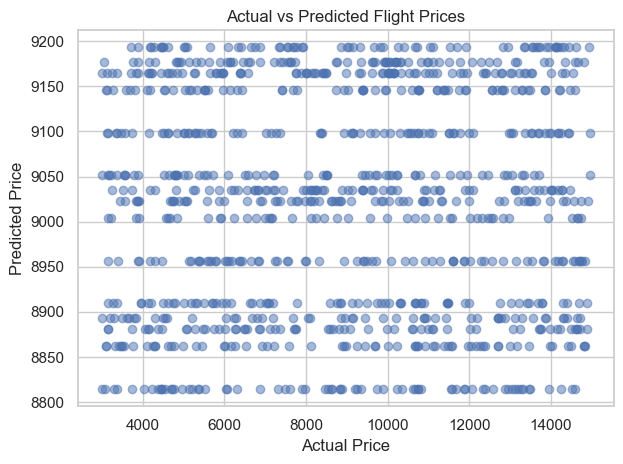

In [44]:
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Flight Prices")
plt.tight_layout()
plt.show()


In [45]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE:", round(rmse, 2))



RMSE: 3472.58


In [46]:
def predict_flight_price(duration_mins, stops):
    sample = pd.DataFrame({
        "Duration_mins": [duration_mins],
        "Stops_Num": [stops]
    })
    predicted_price = model.predict(sample)
    return round(predicted_price[0], 2)

# Example usage:
predict_flight_price(180, 1)


9003.69

##  What I Learned

- How to explore and clean real-world datasets with thousands of entries  
- Feature engineering: converting durations to minutes, generating custom routes  
- Creating insightful visualizations with Seaborn  
- Finding trends in pricing across routes, time, and flight characteristics  
- How to communicate data insights in a business-ready format


##  Project Summary

This project explored 5,000+ Air India domestic flights, uncovering:

-  Clear patterns in pricing based on stops, duration, and route
-  Strong month-over-month trends impacting fare costs
-  Opportunities for business improvements in dynamic pricing

We built and evaluated a simple predictive model that can forecast flight prices with a decent level of accuracy — laying the foundation for smarter fare planning and customer-friendly pricing strategies.

**Thank you for reading!** 

Notebook by - Ashish sahu
